In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [129]:
ds=pd.read_csv(r"C:\Users\shobhit.saxena\Music\Python_New\Projects\empl.csv")

In [130]:
ds

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [131]:
ds.dtypes

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

In [132]:
ds.isnull().sum() #######Checking missing values in the entire dataset

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [133]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
ds['City']=imp.fit_transform(ds['City'].values.reshape(-1,1))

In [134]:
ds['City']

0       Toronto
1       Edmonto
2       Toronto
3      HongKong
4      HongKong
5      HongKong
6       BayArea
7     Hyderabad
8       newyork
9       newyork
10     HongKong
11     HongKong
12     HongKong
13     HongKong
14    Hyderabad
15      newyork
16      newyork
17      Edmonto
18        Congo
19       Angola
20      Finland
21       London
Name: City, dtype: object

In [135]:
ds['Age']

0     28.0
1     31.0
2     34.0
3     26.0
4     30.0
5      NaN
6     43.0
7     38.0
8     50.0
9      NaN
10    26.0
11    30.0
12    22.0
13    43.0
14    38.0
15     NaN
16    27.0
17    31.0
18    34.0
19    32.0
20    26.0
21    27.0
Name: Age, dtype: float64

In [136]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values=np.nan,strategy="mean")
imp1=Imputer(missing_values=np.nan,strategy="most_frequent")
ds['Age']=imp1.fit_transform(ds['Age'].values.reshape(-1,1))    #####Since age is a discrete numeric variable, we are replacing the missing values with median
ds['Salary']=imp.fit_transform(ds['Salary'].values.reshape(-1,1))


C:\Users\shobhit.saxena\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shobhit.saxena\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [137]:
ds['Age']

0     28.0
1     31.0
2     34.0
3     26.0
4     30.0
5     26.0
6     43.0
7     38.0
8     50.0
9     26.0
10    26.0
11    30.0
12    22.0
13    43.0
14    38.0
15    26.0
16    27.0
17    31.0
18    34.0
19    32.0
20    26.0
21    27.0
Name: Age, dtype: float64

In [138]:
ds['Salary']

0     20000.000000
1      3900.000000
2      8000.000000
3     66672.000000
4     33739.947368
5     30007.000000
6      8300.000000
7     54666.000000
8     67666.000000
9      8888.000000
10    66672.000000
11    34344.000000
12    30007.000000
13     8300.000000
14    54666.000000
15    67666.000000
16     8888.000000
17    33739.947368
18    34432.000000
19    34534.000000
20    33451.000000
21    33739.947368
Name: Salary, dtype: float64

In [139]:
ds.describe()

,SNo,Age,Salary
count,22.000000,22.000000,22.000000
mean,12.090909,31.545455,33739.947368
std,6.927578,7.015135,21433.835262
min,1.000000,22.000000,3900.000000
25%,6.250000,26.000000,11666.000000
50%,12.500000,30.000000,33739.947368
75%,17.750000,34.000000,49633.000000
max,23.000000,50.000000,67666.000000


In [140]:
ds.drop(['SNo','Name'],axis=1,inplace=True)  #####Since Serial No. and Age are of no help in predicting the Salary, we are dropping these two columns

In [141]:
ds.head()

,Age,City,Country,Salary
0,28.0,Toronto,Canada,20000.000000
1,31.0,Edmonto,Canada,3900.000000
2,34.0,Toronto,Canada,8000.000000
3,26.0,HongKong,Asia,66672.000000
4,30.0,HongKong,America,33739.947368


In [142]:
ds.describe()

,Age,Salary
count,22.000000,22.000000
mean,31.545455,33739.947368
std,7.015135,21433.835262
min,22.000000,3900.000000
25%,26.000000,11666.000000
50%,30.000000,33739.947368
75%,34.000000,49633.000000
max,50.000000,67666.000000


{'whiskers': [<matplotlib.lines.Line2D at 0xc143f60>,
 'caps': [<matplotlib.lines.Line2D at 0xc14d8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0xc143e10>],
 'medians': [<matplotlib.lines.Line2D at 0xc14df60>],
 'fliers': [<matplotlib.lines.Line2D at 0xc1572e8>],
 'means': []}

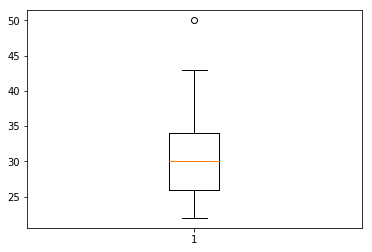

In [143]:
plt.boxplot(ds['Age']) #####Checking outliers in the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0xc1a2898>,
 'caps': [<matplotlib.lines.Line2D at 0xc1a2f28>,
 'boxes': [<matplotlib.lines.Line2D at 0xc1a24a8>],
 'medians': [<matplotlib.lines.Line2D at 0xc1ab5f8>],
 'fliers': [<matplotlib.lines.Line2D at 0xc1ab940>],
 'means': []}

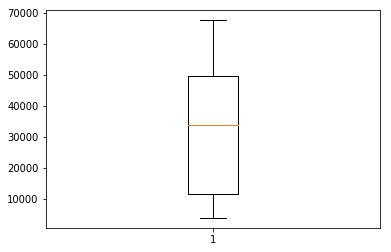

In [144]:
plt.boxplot(ds['Salary'])

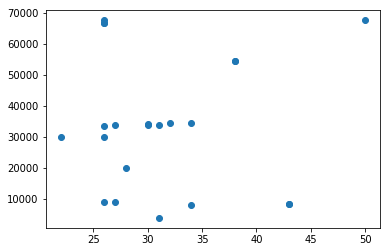

In [145]:
plt.scatter(ds['Age'],ds['Salary'])

In [146]:
from sklearn import preprocessing #########Label Encoding the categorical data
le=preprocessing.LabelEncoder()

ds['City']=le.fit_transform(ds['City'])
ds['Country']=le.fit_transform(ds['Country'])

In [147]:
ds['City']

0     8
1     3
2     8
3     5
4     5
5     5
6     1
7     6
8     9
9     9
10    5
11    5
12    5
13    5
14    6
15    9
16    9
17    3
18    2
19    0
20    4
21    7
Name: City, dtype: int32

In [148]:
ds['Country']

0     3
1     3
2     3
3     2
4     1
5     2
6     1
7     2
8     1
9     1
10    2
11    1
12    2
13    1
14    2
15    1
16    1
17    3
18    0
19    0
20    4
21    4
Name: Country, dtype: int32

In [149]:
x=ds.iloc[:,0:-1]
y=ds.iloc[:,-1]

In [150]:
x.shape

(22, 3)

In [151]:
y.shape

(22,)

In [152]:
lm=LinearRegression
lm=Lasso()
lm.fit(x,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [153]:
lm.score(x,y)

0.026775969231489727

In [154]:
lm.coef_

array([   18.26013492,  1189.17295827, -1879.22797281])

In [155]:
lm.intercept_

30148.356606917736